In [248]:

import pandas as pd
import requests
import time

def fetch_data(year, month, api_key):
    url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articles = data['response']['docs']
        return articles
    else:
        print(f"Failed to fetch data for {year}-{month}: {response.status_code}")
        return []

# Initialize lists for headlines and dates
all_headlines = []
all_dates = []

# API key
api_key = 'Z7LiuLGnozS868StkM3QcbQhsJA8acDt'

# Fetch data for each year from 2012 to 2024
for year in range(2012, 2024):
    for month in range(1, 13):
        print(f"Fetching data for {year}-{month}")
        try:
            articles = fetch_data(year, month, api_key)
            if articles:
                all_headlines.extend([article['headline']['main'] for article in articles])
                all_dates.extend([article['pub_date'] for article in articles])
            # Sleep to respect API rate limits
            time.sleep(6)  # Adjust sleep time as needed based on API rate limits
        except Exception as e:
            print(f"Error fetching data for {year}-{month}: {e}")

# Create a DataFrame
df = pd.DataFrame({'datetime': all_dates, 'news': all_headlines})

# Convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date
df['date'] = df['datetime'].dt.date

# Filter articles containing information about Apple company stock
keywords = ['Amazon', 'AMZN', 'Amazon Inc', 'Amazon stock', 'Amazon shares']
df['contains_amazon_stock_info'] = df['news'].apply(lambda x: any(keyword in x for keyword in keywords))

# Create a filtered DataFrame
amazon_stock_df = df[df['contains_amazon_stock_info']]

# Group by date and concatenate news articles
grouped_amazon_df = amazon_stock_df.groupby('date')['news'].agg(' '.join).reset_index()

# Rename columns and convert Date to datetime format
grouped_amazon_df.columns = ['Date', 'news_articles']
grouped_amazon_df['Date'] = pd.to_datetime(grouped_amazon_df['Date'])

# Print the resulting DataFrame
print(grouped_amazon_df)


Fetching data for 2012-1
Fetching data for 2012-2
Fetching data for 2012-3
Fetching data for 2012-4
Fetching data for 2012-5
Fetching data for 2012-6
Fetching data for 2012-7
Fetching data for 2012-8
Fetching data for 2012-9
Failed to fetch data for 2012-9: 429
Fetching data for 2012-10
Failed to fetch data for 2012-10: 429
Fetching data for 2012-11
Failed to fetch data for 2012-11: 429
Fetching data for 2012-12
Fetching data for 2013-1
Fetching data for 2013-2
Fetching data for 2013-3
Fetching data for 2013-4
Fetching data for 2013-5
Failed to fetch data for 2013-5: 429
Fetching data for 2013-6
Failed to fetch data for 2013-6: 429
Fetching data for 2013-7
Failed to fetch data for 2013-7: 429
Fetching data for 2013-8
Failed to fetch data for 2013-8: 429
Fetching data for 2013-9
Fetching data for 2013-10
Fetching data for 2013-11
Fetching data for 2013-12
Fetching data for 2014-1
Fetching data for 2014-2
Failed to fetch data for 2014-2: 429
Fetching data for 2014-3
Failed to fetch data 

In [249]:
grouped_amazon_df=grouped_amazon_df.copy()

In [250]:
grouped_amazon_df

,Date,news_articles
0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...
1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go"
2,2012-01-14,"Once Hidden by Forest, Carvings in Land Attest..."
3,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr..."
4,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...
...,...,...
468,2019-10-25,Microsoft Wins Pentagon’s $10 Billion JEDI Con...
469,2019-10-26,Catholic Bishops Back Ordination of Married Me...
470,2019-10-28,How Your Amazon Delivery Helps to Clog the Str...
471,2019-10-29,Amazon Turns to More Free Grocery Delivery to ...


In [251]:
df=[grouped_amazon_df]
final_df=pd.concat(df)

In [252]:
final_df.to_csv('final_df.csv')

In [253]:
headlines_df=pd.read_csv('/content/final_df.csv')

In [254]:
headlines_df.head()

,Unnamed: 0,Date,news_articles
0,0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...
1,1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go"
2,2,2012-01-14,"Once Hidden by Forest, Carvings in Land Attest..."
3,3,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr..."
4,4,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...


In [255]:
headlines_df.drop(columns=['Unnamed: 0'],inplace=True)

In [256]:
headlines_df.head()

,Date,news_articles
0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...
1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go"
2,2012-01-14,"Once Hidden by Forest, Carvings in Land Attest..."
3,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr..."
4,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...


In [257]:
!pip install vaderSentiment

In [258]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [259]:
# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create an empty list to store the polarity scores
polarity_scores = []

# Iterate through each headline in 'news_articles' column
for headline in headlines_df['news_articles']:
    # Calculate polarity scores for the headline
    scores = analyzer.polarity_scores(headline)
    # Append the scores to the list
    polarity_scores.append(scores)

# Convert the list of dictionaries to a DataFrame (optional)
polarity_df = pd.DataFrame(polarity_scores)

In [260]:
polarity_scores

[{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.5719},
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.7579},
 {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.146, 'neu': 0.677, 'pos': 0.177, 'compound': -0.1027},
 {'neg': 0.165, 'neu': 0.549, 'pos': 0.287, 'compound': 0.25},
 {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.5423},
 {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.4767},
 {'neg': 0.178, 'neu': 0.526, 'pos': 0.296, 'compound': -0.0516},
 {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.1779},
 {'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.1779},
 {'neg': 0.321, 'neu': 0.476, 'pos': 0.202, 'compound': -0.25},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.198, 'neu': 0.661, 'pos': 0.14, 'compound': -0.1779},
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6124},
 {'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.1779},
 {

In [261]:
polarity_df = pd.DataFrame(polarity_scores)

In [262]:

df=polarity_df
df.head()

,neg,neu,pos,compound
0,0.000,0.659,0.341,0.5719
1,0.000,0.286,0.714,0.7579
2,0.173,0.827,0.000,-0.3182
3,0.146,0.677,0.177,-0.1027
4,0.165,0.549,0.287,0.2500


In [263]:
# Merge DataFrames on their indices
merged_df = headlines_df.merge(df, left_index=True, right_index=True)

# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Print the merged DataFrame
print(merged_df)

          Date                                      news_articles    neg  \
0   2012-01-04  Will Amazon Offer Analytics as a Service? Amaz...  0.000   
1   2012-01-06                 Amazon Kindles: Easy Come, Easy Go  0.000   
2   2012-01-14  Once Hidden by Forest, Carvings in Land Attest...  0.173   
3   2012-01-25  In Brazil, Fears of a Slide Back for Amazon Pr...  0.146   
4   2012-01-31  Barnes & Noble Won’t Sell Books From Amazon Pu...  0.165   
..         ...                                                ...    ...   
468 2019-10-25  Microsoft Wins Pentagon’s $10 Billion JEDI Con...  0.130   
469 2019-10-26  Catholic Bishops Back Ordination of Married Me...  0.000   
470 2019-10-28  How Your Amazon Delivery Helps to Clog the Str...  0.000   
471 2019-10-29  Amazon Turns to More Free Grocery Delivery to ...  0.000   
472 2019-10-30  Amazon Tests ‘Soul of Seattle’ With Deluge of ...  0.000   

       neu    pos  compound  
0    0.659  0.341    0.5719  
1    0.286  0.714    0.7579

In [264]:
merged_df.head()

,Date,news_articles,neg,neu,pos,compound
0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...,0.000,0.659,0.341,0.5719
1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go",0.000,0.286,0.714,0.7579
2,2012-01-14,"Once Hidden by Forest, Carvings in Land Attest...",0.173,0.827,0.000,-0.3182
3,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr...",0.146,0.677,0.177,-0.1027
4,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...,0.165,0.549,0.287,0.2500


In [265]:
!pip install yfinance

In [266]:
import yfinance as yf

In [267]:
ticker_symbol = 'AMZN'
start_date = '2012-01-01'
end_date = '2024-04-23'
# Download stock data using yfinance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
stock_data=stock_data.reset_index()
final_df= pd.merge(merged_df, stock_data, on='Date', how='inner')

[*********************100%%**********************]  1 of 1 completed


In [268]:
final_df.shape

(399, 12)

In [269]:
final_df.head()

,Date,news_articles,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume
0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,8.8755,84104000
1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go",0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,9.1305,140168000
2,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr...",0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,9.3900,86128000
3,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,9.7220,255444000
4,2012-02-03,Amazon Has Tried Everything to Make Shopping E...,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,9.3840,162410000


we have created our final dataset now we will start text pre processing on news_article column

In [270]:
final_df.to_csv('finance_df.csv')
final_df=pd.read_csv('/content/finance_df.csv')
final_df.head()

,Unnamed: 0,Date,news_articles,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,8.8755,84104000
1,1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go",0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,9.1305,140168000
2,2,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr...",0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,9.3900,86128000
3,3,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,9.7220,255444000
4,4,2012-02-03,Amazon Has Tried Everything to Make Shopping E...,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,9.3840,162410000


In [271]:
!pip install nltk scikit-learn

In [272]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers from the text
    text = re.sub(r'\d+', '', text)

    # Remove punctuation from the text
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [273]:
final_df['clean_article']=final_df['news_articles'].apply(preprocess_text)
final_df.head()

,Unnamed: 0,Date,news_articles,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume,clean_article
0,0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,8.8755,84104000,amazon offer analytics service amazon publish ...
1,1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go",0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,9.1305,140168000,amazon kindles easy come easy go
2,2,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr...",0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,9.3900,86128000,brazil fear slide back amazon protection amazo...
3,3,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,9.7220,255444000,barnes noble wont sell book amazon publishing ...
4,4,2012-02-03,Amazon Has Tried Everything to Make Shopping E...,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,9.3840,162410000,amazon tried everything make shopping easier e...


We would use word2 vec embedding for converting text into numericals

In [274]:
from nltk.tokenize import sent_tokenize

In [275]:
coll = []

# Tokenize sentences and words
for text in final_df['clean_article']:
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        coll.append(words)


In [276]:
import gensim
from gensim.models import Word2Vec

num_features = 300
num_processor = 4
context = 10
downsampling = 0.001

# Assuming 'coll' is your list of tokenized sentences as created earlier
# Example: coll = [['word1', 'word2', ...], ['another', 'sentence', ...], ...]

# Initialize Word2Vec model
model = Word2Vec(sentences=coll,
                 vector_size=num_features,
                 window=context,
                 workers=num_processor,
                 sample=downsampling)

In [277]:
# Unload unneccessary memory once the learning process is done.

model.init_sims(replace = True)

<ipython-input-277-4453b4960ec5>:3: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace = True)


In [278]:
vocab_size = len(model.wv.key_to_index)
print("Vocab size", vocab_size)

Vocab size 141


In [279]:
df={
    'clean_article':final_df['clean_article']
}
df=pd.DataFrame(df)

In [280]:
import numpy as np
def get_average_word2vec(text, model):
    # Tokenize the processed text
    tokens = word_tokenize(text.lower())

    # Filter tokens that are in the Word2Vec model's vocabulary
    valid_tokens = [token for token in tokens if token in model.wv]

    # If no valid tokens, return a zero vector
    if not valid_tokens:
        return np.zeros(model.vector_size)

    # Get embeddings for valid tokens
    embeddings = [model.wv[token] for token in valid_tokens]

    # Compute the average embedding
    avg_embedding = np.mean(embeddings, axis=0)

    return avg_embedding

# Calculate average Word2Vec embedding for the processed text
avg_embedding = df['clean_article'].apply(lambda x:get_average_word2vec(x,model))

In [281]:
df['avg_embedding']=avg_embedding

In [282]:
embedding_df = pd.DataFrame(df['avg_embedding'].to_list())
embedding_df.columns = [f'embedding_{i}' for i in range(embedding_df.shape[1])]

In [283]:
embedding_df

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
0,-0.022663,0.077830,0.002880,0.003879,-0.018506,-0.068479,0.080648,0.171793,-0.035229,-0.055885,...,0.035345,0.091527,0.024585,0.031059,0.092256,0.094040,0.022944,-0.011506,0.010544,-0.020961
1,-0.022946,0.082670,-0.004050,0.012447,-0.009773,-0.072351,0.065674,0.164475,-0.043310,-0.005365,...,0.008791,0.102776,0.035107,0.016594,0.087216,0.122156,0.016911,-0.031794,0.047331,-0.011699
2,-0.029371,0.098719,0.002639,0.000463,-0.018785,-0.060011,0.081647,0.170524,-0.026746,-0.040180,...,0.023360,0.091959,0.023694,0.015555,0.076876,0.100373,0.012392,-0.020318,0.035152,0.001468
3,-0.013759,0.065542,-0.008528,0.015761,-0.004985,-0.047358,0.042905,0.140139,-0.010477,-0.043479,...,0.035786,0.090022,0.021898,-0.014471,0.072563,0.105905,0.028147,0.003621,0.012577,-0.002144
4,-0.048398,0.091369,-0.004452,0.028590,-0.026952,-0.060009,0.094781,0.190245,-0.023308,-0.027459,...,0.027766,0.102331,0.001917,0.008685,0.078069,0.120668,0.009566,0.001244,0.046750,-0.018805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,-0.028987,0.089576,-0.007642,0.014895,-0.012371,-0.057209,0.053125,0.156878,-0.034712,-0.032676,...,0.036925,0.101641,0.025212,0.003728,0.091630,0.072080,-0.001615,-0.025107,0.062753,-0.029768
395,-0.012478,0.078722,-0.009839,0.012988,-0.034389,-0.061618,0.062135,0.172115,-0.036437,-0.017582,...,0.035456,0.087851,0.014243,-0.017219,0.083172,0.136012,-0.002840,-0.034573,0.029513,-0.007064
396,0.003340,0.103016,-0.016600,0.050520,-0.026802,-0.095307,0.023084,0.117583,-0.037167,-0.004975,...,0.037565,0.049249,0.028118,-0.002523,0.071966,0.090117,-0.026078,-0.046990,0.058272,-0.015096
397,-0.017568,0.104910,-0.001306,0.015590,-0.012866,-0.080898,0.063993,0.161848,-0.025825,-0.020506,...,0.037356,0.071389,0.023513,0.019285,0.106559,0.111196,0.003931,-0.017784,0.008042,-0.031039


now lets create dependent variable

In [284]:

final_df.head()

,Unnamed: 0,Date,news_articles,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume,clean_article
0,0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,8.8755,84104000,amazon offer analytics service amazon publish ...
1,1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go",0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,9.1305,140168000,amazon kindles easy come easy go
2,2,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr...",0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,9.3900,86128000,brazil fear slide back amazon protection amazo...
3,3,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,9.7220,255444000,barnes noble wont sell book amazon publishing ...
4,4,2012-02-03,Amazon Has Tried Everything to Make Shopping E...,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,9.3840,162410000,amazon tried everything make shopping easier e...


In [285]:
final_df['Daily Return']=final_df['Adj Close'].pct_change()
final_df.isnull().sum()

Unnamed: 0       0
Date             0
news_articles    0
neg              0
neu              0
pos              0
compound         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
clean_article    0
Daily Return     1
dtype: int64

Now this null value in daily return column is there which offcourse will be of first row of our dataset there fore to solve this issue lets take it as 0


In [286]:
final_df['Daily Return'].fillna(0,inplace=True)
final_df.head()

,Unnamed: 0,Date,news_articles,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume,clean_article,Daily Return
0,0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,8.8755,84104000,amazon offer analytics service amazon publish ...,0.000000
1,1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go",0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,9.1305,140168000,amazon kindles easy come easy go,0.028731
2,2,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr...",0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,9.3900,86128000,brazil fear slide back amazon protection amazo...,0.028421
3,3,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,9.7220,255444000,barnes noble wont sell book amazon publishing ...,0.035357
4,4,2012-02-03,Amazon Has Tried Everything to Make Shopping E...,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,9.3840,162410000,amazon tried everything make shopping easier e...,-0.034767


In [287]:
label=[]
for i in final_df['Daily Return']:
  if i>0:
    label.append(1)
  else :
    label.append(0)

final_df['label']=label
final_df.head()

,Unnamed: 0,Date,news_articles,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume,clean_article,Daily Return,label
0,0,2012-01-04,Will Amazon Offer Analytics as a Service? Amaz...,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,8.8755,84104000,amazon offer analytics service amazon publish ...,0.000000,0
1,1,2012-01-06,"Amazon Kindles: Easy Come, Easy Go",0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,9.1305,140168000,amazon kindles easy come easy go,0.028731,1
2,2,2012-01-25,"In Brazil, Fears of a Slide Back for Amazon Pr...",0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,9.3900,86128000,brazil fear slide back amazon protection amazo...,0.028421,1
3,3,2012-01-31,Barnes & Noble Won’t Sell Books From Amazon Pu...,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,9.7220,255444000,barnes noble wont sell book amazon publishing ...,0.035357,1
4,4,2012-02-03,Amazon Has Tried Everything to Make Shopping E...,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,9.3840,162410000,amazon tried everything make shopping easier e...,-0.034767,0


we have created embedding and dependent variable do now we will create merged_df which is with embeddings and split in train ans test

In [288]:
final_df.drop(columns=['news_articles'],inplace=True)

In [289]:
final_df.head()
final_df.drop(columns=['Volume','Daily Return'],inplace=True)
final_df.drop(columns=['clean_article'],inplace=True)

In [290]:
final_df.head()

,Unnamed: 0,Date,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,label
0,0,2012-01-04,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,8.8755,0
1,1,2012-01-06,0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,9.1305,1
2,2,2012-01-25,0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,9.3900,1
3,3,2012-01-31,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,9.7220,1
4,4,2012-02-03,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,9.3840,0


In [291]:
embedding_df.head()

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
0,-0.022663,0.077830,0.002880,0.003879,-0.018506,-0.068479,0.080648,0.171793,-0.035229,-0.055885,...,0.035345,0.091527,0.024585,0.031059,0.092256,0.094040,0.022944,-0.011506,0.010544,-0.020961
1,-0.022946,0.082670,-0.004050,0.012447,-0.009773,-0.072351,0.065674,0.164475,-0.043310,-0.005365,...,0.008791,0.102776,0.035107,0.016594,0.087216,0.122156,0.016911,-0.031794,0.047331,-0.011699
2,-0.029371,0.098719,0.002639,0.000463,-0.018785,-0.060011,0.081647,0.170524,-0.026746,-0.040180,...,0.023360,0.091959,0.023694,0.015555,0.076876,0.100373,0.012392,-0.020318,0.035152,0.001468
3,-0.013759,0.065542,-0.008528,0.015761,-0.004985,-0.047358,0.042905,0.140139,-0.010477,-0.043479,...,0.035786,0.090022,0.021898,-0.014471,0.072563,0.105905,0.028147,0.003621,0.012577,-0.002144
4,-0.048398,0.091369,-0.004452,0.028590,-0.026952,-0.060009,0.094781,0.190245,-0.023308,-0.027459,...,0.027766,0.102331,0.001917,0.008685,0.078069,0.120668,0.009566,0.001244,0.046750,-0.018805


In [292]:
merged_df = final_df.merge(embedding_df, left_index=True, right_index=True)

In [293]:
X=merged_df.drop(columns=['label'])
y=merged_df['label']

In [294]:
X.shape

(399, 311)

In [295]:
split=int(0.7*X.shape[0])

In [296]:
from sklearn.model_selection import train_test_split
X_train = X.iloc[0:split,:]
X_test=X.iloc[split:,:]
y_train=y.iloc[0:split]
y_test=y.iloc[split:]

X_train.head()

,Unnamed: 0,Date,neg,neu,pos,compound,Open,High,Low,Close,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
0,0,2012-01-04,0.000,0.659,0.341,0.5719,8.9605,9.0250,8.8035,8.8755,...,0.035345,0.091527,0.024585,0.031059,0.092256,0.094040,0.022944,-0.011506,0.010544,-0.020961
1,1,2012-01-06,0.000,0.286,0.714,0.7579,8.9035,9.2325,8.8750,9.1305,...,0.008791,0.102776,0.035107,0.016594,0.087216,0.122156,0.016911,-0.031794,0.047331,-0.011699
2,2,2012-01-25,0.146,0.677,0.177,-0.1027,9.3495,9.4085,9.2305,9.3900,...,0.023360,0.091959,0.023694,0.015555,0.076876,0.100373,0.012392,-0.020318,0.035152,0.001468
3,3,2012-01-31,0.165,0.549,0.287,0.2500,9.7000,9.7815,9.4850,9.7220,...,0.035786,0.090022,0.021898,-0.014471,0.072563,0.105905,0.028147,0.003621,0.012577,-0.002144
4,4,2012-02-03,0.000,0.640,0.360,0.5423,9.1415,9.3950,9.0945,9.3840,...,0.027766,0.102331,0.001917,0.008685,0.078069,0.120668,0.009566,0.001244,0.046750,-0.018805


In [297]:
date=X_test['Date']
adjclose=X_test['Adj Close']
X_train.drop(columns=['Date','Open','High','Low','Close','Adj Close','Unnamed: 0'],inplace=True)
X_test.drop(columns=['Date','Open','High','Low','Close','Adj Close','Unnamed: 0'],inplace=True)

<ipython-input-297-be02d3a2d119>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Date','Open','High','Low','Close','Adj Close','Unnamed: 0'],inplace=True)
<ipython-input-297-be02d3a2d119>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['Date','Open','High','Low','Close','Adj Close','Unnamed: 0'],inplace=True)


In [298]:
y

0      0
1      1
2      1
3      1
4      0
      ..
394    0
395    0
396    1
397    0
398    1
Name: label, Length: 399, dtype: int64

In [299]:
X_test

,neg,neu,pos,compound,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
279,0.058,0.603,0.339,0.8779,-0.019620,0.125549,-0.023613,0.026867,-0.025378,-0.065448,...,0.015991,0.105581,0.022400,0.015051,0.097649,0.111396,0.006085,-0.007043,0.036322,-0.032932
280,0.000,0.835,0.165,0.8074,-0.015546,0.113717,-0.009092,0.016407,-0.019747,-0.069550,...,0.024082,0.106457,0.022738,0.015968,0.098046,0.121079,0.007569,-0.012164,0.040101,-0.030111
281,0.000,0.715,0.285,0.6557,-0.041480,0.114433,-0.028498,0.019012,-0.034870,-0.061704,...,0.031128,0.088386,0.038761,0.009753,0.097281,0.105531,0.002460,-0.017706,0.014154,-0.013934
282,0.000,0.793,0.207,0.3400,-0.016745,0.102328,0.011258,0.018033,-0.020901,-0.069419,...,0.020127,0.101496,0.040951,0.006469,0.089189,0.100534,0.005739,-0.009779,0.019502,0.002316
283,0.000,0.825,0.175,0.1779,-0.037645,0.107471,-0.000009,-0.010589,-0.038645,-0.048208,...,0.044688,0.080528,0.039990,0.018039,0.066723,0.091244,0.003376,-0.035948,0.014879,-0.014253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000,0.522,0.478,0.6705,-0.028987,0.089576,-0.007642,0.014895,-0.012371,-0.057209,...,0.036925,0.101641,0.025212,0.003728,0.091630,0.072080,-0.001615,-0.025107,0.062753,-0.029768
395,0.130,0.458,0.412,0.5719,-0.012478,0.078722,-0.009839,0.012988,-0.034389,-0.061618,...,0.035456,0.087851,0.014243,-0.017219,0.083172,0.136012,-0.002840,-0.034573,0.029513,-0.007064
396,0.000,0.619,0.381,0.5106,0.003340,0.103016,-0.016600,0.050520,-0.026802,-0.095307,...,0.037565,0.049249,0.028118,-0.002523,0.071966,0.090117,-0.026078,-0.046990,0.058272,-0.015096
397,0.000,0.630,0.370,0.6478,-0.017568,0.104910,-0.001306,0.015590,-0.012866,-0.080898,...,0.037356,0.071389,0.023513,0.019285,0.106559,0.111196,0.003931,-0.017784,0.008042,-0.031039


In [300]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 279 to 398
Columns: 304 entries, neg to embedding_299
dtypes: float64(304)
memory usage: 285.1 KB


In [301]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import  recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [310]:
svc = SVC(kernel='rbf', gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression( penalty='l2')
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
abc = AdaBoostClassifier(n_estimators=100, random_state=2)
bc = BaggingClassifier(n_estimators=100, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=100,random_state=2)
xgb = XGBClassifier(n_estimators=100,random_state=2)

In [311]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'BNB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'GBDT':gbdt,
    'xgb':xgb
 }

For  SVC
Recall -  1.0
Precision -  0.49166666666666664
F1-score -  0.659217877094972
Accuracy -  0.49166666666666664
AUC -  0.5147263128646846
************************
For  KN
Recall -  0.576271186440678
Precision -  0.4594594594594595
F1-score -  0.5112781954887218
Accuracy -  0.4583333333333333
AUC -  0.5072242289524869
************************
For  BNB
Recall -  0.864406779661017
Precision -  0.49038461538461536
F1-score -  0.6257668711656442
Accuracy -  0.49166666666666664
AUC -  0.4451236454570714
************************
For  DT
Recall -  0.6101694915254238
Precision -  0.4864864864864865
F1-score -  0.5413533834586467
Accuracy -  0.49166666666666664
AUC -  0.49902750764101145
************************
For  LR
Recall -  1.0
Precision -  0.49166666666666664
F1-score -  0.659217877094972
Accuracy -  0.49166666666666664
AUC -  0.4002500694637399
************************
For  RF
Recall -  0.7457627118644068
Precision -  0.4888888888888889
F1-score -  0.5906040268456376
Accuracy -  0.

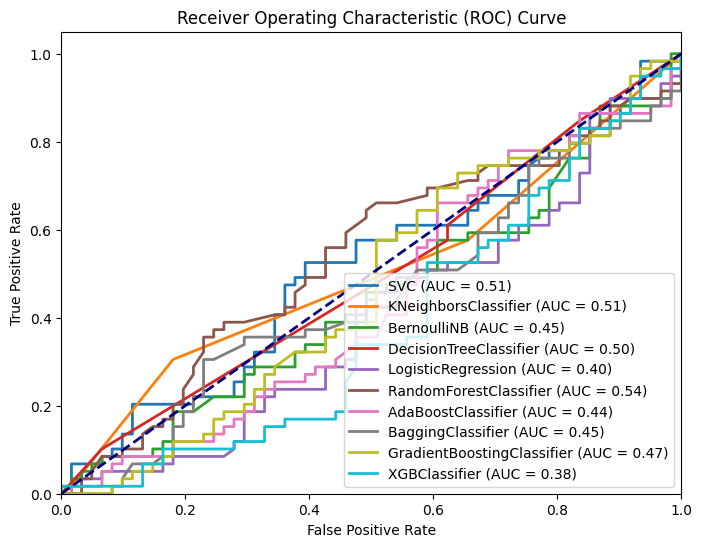

In [312]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

results = []

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    return {
        'Classifier': clf.__class__.__name__,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1score,
        'Accuracy': accuracy,
        'AUC': auc,
        'y_pred_proba': y_pred_proba
    }

# Assuming clfs is a dictionary of classifiers and X_train, y_train, X_test, y_test are your training and testing data
for name, clf in clfs.items():
    result = train_classifier(clf, X_train, y_train, X_test, y_test)
    results.append(result)

    print("For ", name)
    print("Recall - ", result['Recall'])
    print("Precision - ", result['Precision'])
    print("F1-score - ", result['F1-score'])
    print("Accuracy - ", result['Accuracy'])
    print("AUC - ", result['AUC'])
    print("************************")

# Create DataFrame from results
df = pd.DataFrame(results)

# Plot ROC curves
plt.figure(figsize=(8, 6))

for result in results:
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, lw=2, label=f"{result['Classifier']} (AUC = {result['AUC']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [313]:
df


,Classifier,Recall,Precision,F1-score,Accuracy,AUC,y_pred_proba
0,SVC,1.000000,0.491667,0.659218,0.491667,0.514726,"[0.5250632905025372, 0.5452262028868959, 0.528..."
1,KNeighborsClassifier,0.576271,0.459459,0.511278,0.458333,0.507224,"[0.4, 0.6, 0.8, 1.0, 0.8, 0.4, 0.4, 0.6, 0.8, ..."
2,BernoulliNB,0.864407,0.490385,0.625767,0.491667,0.445124,"[0.7211886973827122, 0.7021423421574312, 0.386..."
3,DecisionTreeClassifier,0.610169,0.486486,0.541353,0.491667,0.499028,"[0.7835051546391752, 0.7835051546391752, 0.783..."
4,LogisticRegression,1.000000,0.491667,0.659218,0.491667,0.400250,"[0.6331317123670508, 0.5866680371275349, 0.596..."
5,RandomForestClassifier,0.745763,0.488889,0.590604,0.491667,0.538761,"[0.6341666666666668, 0.5098809523809522, 0.54,..."
6,AdaBoostClassifier,0.559322,0.485294,0.519685,0.491667,0.443040,"[0.49809504814130395, 0.4979184368061731, 0.50..."
7,BaggingClassifier,0.728814,0.483146,0.581081,0.483333,0.449986,"[0.69, 0.546, 0.534, 0.74, 0.6675, 0.260452380..."
8,GradientBoostingClassifier,0.728814,0.524390,0.609929,0.541667,0.469297,"[0.5796746494055206, 0.6565891697135393, 0.796..."
9,XGBClassifier,0.559322,0.445946,0.496241,0.441667,0.383718,"[0.88739145, 0.72494847, 0.46382698, 0.9124895..."


In [209]:
#support vector classifier (SVC)

In [343]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Define your SVC classifier
svc = SVC()

# Define the parameter grid
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform Randomized Search CV
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluate on test set with best estimator
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("\nEvaluation on test set:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Best cross-validation score: 0.58

Evaluation on test set:
Accuracy: 0.49
Precision: 0.49
Recall: 1.00
F1-score: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.49      1.00      0.66        59

    accuracy                           0.49       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.24      0.49      0.32       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [344]:
#Grid Search CV Example:

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

# Define your SVC classifier
svc = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set with best estimator
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("\nEvaluation on test set:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.58

Evaluation on test set:
Accuracy: 0.49
Precision: 0.49
Recall: 1.00
F1-score: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.49      1.00      0.66        59

    accuracy                           0.49       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.24      0.49      0.32       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [354]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

# Define SVC classifier
svc = SVC()

# Parameter grid for RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluate on test set with best estimator
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("\nEvaluation on test set:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Best cross-validation score: 0.58

Evaluation on test set:
Accuracy: 0.49
Precision: 0.49
Recall: 1.00
F1-score: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.49      1.00      0.66        59

    accuracy                           0.49       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.24      0.49      0.32       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [355]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression classifier
lrc = LogisticRegression()

# Parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty: l1 (Lasso) or l2 (Ridge)
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lrc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set with best estimator
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("\nEvaluation on test set:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.58

Evaluation on test set:
Accuracy: 0.49
Precision: 0.49
Recall: 1.00
F1-score: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.49      1.00      0.66        59

    accuracy                           0.49       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.24      0.49      0.32       120



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

In [353]:
#random forest
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest classifier
rfc = RandomForestClassifier()

# Parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set with best estimator
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("\nEvaluation on test set:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [349]:
#x boost
from xgboost import XGBClassifier

# Define XGBoost classifier
xgb = XGBClassifier()

# Parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluate on test set with best estimator
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("\nEvaluation on test set:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [356]:
from sklearn.ensemble import VotingClassifier

In [357]:
svm_clf = SVC(probability=True, kernel='rbf', gamma='scale', C=1.0)
logreg_clf = LogisticRegression(max_iter=1000, random_state=42)
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('logreg', logreg_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Voting Classifier: {:.2f}".format(accuracy))

Accuracy of Voting Classifier: 0.49


In [358]:
# Define parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Predict on the test set
y_pred_logreg = best_logreg_model.predict(X_test)

# Evaluate accuracy, precision, recall, and F1-score
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1score_logreg = f1_score(y_test, y_pred_logreg)

print("\nEvaluation for Logistic Regression:")
print("Accuracy: {:.2f}".format(accuracy_logreg))
print("Precision: {:.2f}".format(precision_logreg))
print("Recall: {:.2f}".format(recall_logreg))
print("F1-score: {:.2f}".format(f1score_logreg))
print("Best Parameters Found:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Evaluation for Logistic Regression:
Accuracy: 0.49
Precision: 0.49
Recall: 1.00
F1-score: 0.66
Best Parameters Found:
{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}


In [359]:
from sklearn.svm import SVC

# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=SVC(probability=True),
                               param_grid=svm_param_grid,
                               cv=5,
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)

# Fit GridSearchCV for SVM
svm_grid_search.fit(X_train, y_train)

# Get the best SVM model
best_svm_model = svm_grid_search.best_estimator_

# Print best parameters and best cross-validation score
print("Best parameters found for SVM:")
print(svm_grid_search.best_params_)
print("Best cross-validation score for SVM: {:.2f}".format(svm_grid_search.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found for SVM:
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.58


In [360]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming best_logreg_model and best_svm_model are already defined and trained

# Create Voting Classifier with tuned models
voting_clf = VotingClassifier(estimators=[
    ('logreg', best_logreg_model),
    ('svm', best_svm_model)
], voting='hard')

# Fit Voting Classifier on training data
voting_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1score_voting = f1_score(y_test, y_pred_voting)

print("\nEvaluation for Voting Classifier:")
print("Accuracy: {:.2f}".format(accuracy_voting))
print("Precision: {:.2f}".format(precision_voting))
print("Recall: {:.2f}".format(recall_voting))
print("F1-score: {:.2f}".format(f1score_voting))

# Optionally, print classification report for more detailed evaluation
print("\nClassification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))



Evaluation for Voting Classifier:
Accuracy: 0.49
Precision: 0.49
Recall: 1.00
F1-score: 0.66

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.49      1.00      0.66        59

    accuracy                           0.49       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.24      0.49      0.32       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [361]:
#stacking classifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Define base classifiers (best_logreg_model and best_svm_model are assumed to be defined and trained)
base_classifiers = [
    ('logreg', best_logreg_model),
    ('svm', best_svm_model),
]

# Initialize Stacking Classifier with a final estimator (e.g., SVC)
stacking_clf = StackingClassifier(estimators=base_classifiers,
                                  final_estimator=SVC(),
                                  cv=5,
                                  stack_method='auto',
                                  n_jobs=-1)

# Fit Stacking Classifier on training data
stacking_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print("\nEvaluation for Stacking Classifier:")
print("Accuracy: {:.2f}".format(accuracy_stacking))

# Optionally, print classification report for more detailed evaluation
print("\nClassification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred_stacking))




Evaluation for Stacking Classifier:
Accuracy: 0.49

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.49      1.00      0.66        59

    accuracy                           0.49       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.24      0.49      0.32       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [363]:
y_pred = svc.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [338]:
y_pred_svm


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [339]:
y_pred=y_pred_svm
stock_prices = adjclose

In [341]:
stock_prices=stock_prices.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [332]:


buy_signals = []
buy_dates = []
sell_signals = []
sell_dates=[]

for i in range(len(y_pred)):
    if y_pred[i] == 1:
        buy_signals.append(i)
        buy_dates.append(date[i])
    else :
      sell_signals.append(i)
      sell_dates.append(date[i])
print("Buy signals indices:", buy_signals)
print("Buy dates:", buy_dates)
print("Sell signals indices:", sell_signals)
print("Sell dates:", sell_dates)

KeyError: 0

In [228]:
len(date)

190

In [229]:
len(stock_prices)

190

In [235]:
import numpy as np

initial_cash = 5000  # Update initial cash to $5000
cash = initial_cash
portfolio_value = []
positions = 0
buy_price = 0
num_trades = 0
wins = 0

daily_returns = []
peak_value = initial_cash
max_drawdown = 0.0

for i, price in enumerate(stock_prices):
    if date[i] in buy_dates and cash > 0:
        buy_price = price
        positions = cash / buy_price
        cash = 0
        num_trades += 1
        print(f"Buying at {buy_price} on date {date[i]}")

    elif date[i] in sell_dates and positions > 0:
        sell_price = price
        cash = sell_price * positions
        positions = 0
        num_trades += 1
        print(f"Selling at {sell_price} on date {date[i]}")
        if sell_price > buy_price:
            wins += 1

    current_value = cash + positions * price
    portfolio_value.append(current_value)

    if len(portfolio_value) > 1:
        daily_return = (portfolio_value[-1] - portfolio_value[-2]) / portfolio_value[-2]
        daily_returns.append(daily_return)

    if current_value > peak_value:
        peak_value = current_value

    drawdown = (current_value - peak_value) / peak_value
    if drawdown < max_drawdown:
        max_drawdown = drawdown

risk_free_rate = 0.0  # Assuming risk-free rate is 0%
average_daily_return = np.mean(daily_returns)
std_daily_return = np.std(daily_returns)
sharpe_ratio = (average_daily_return - risk_free_rate) / std_daily_return if std_daily_return != 0 else np.nan

# Calculate Win Ratio
win_ratio = wins / num_trades if num_trades > 0 else 0.0

# Output results
print(f"Final Portfolio Value: ${portfolio_value[-1]:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Number of Trades Executed: {num_trades}")
print(f"Win Ratio: {win_ratio:.2%}")



IndexError: list index out of range

In [232]:
portfolio_value

[5000.0,
 5065.506182437989,
 5069.464987899979,
 5178.408897947589,
 5204.655090659381,
 5224.864622336232,
 5270.642523938391,
 5357.145860788883,
 5329.915473395972,
 5297.063929335021,
 5271.976810250736,
 5251.657812363167,
 5341.923048991735,
 5404.629833333689,
 5688.570499443591,
 5790.47152703762,
 5594.740268720858,
 5566.437913435188,
 5626.935682994397,
 5804.754197628695,
 5980.647708898909,
 5889.8134482176765,
 6296.258818704731,
 6321.630282946126,
 6999.00252252868,
 6780.086788015746,
 6532.147155694058,
 6682.319444830097,
 6562.286407393722,
 6921.750749176066,
 7053.682229735935,
 6885.618889916506,
 6916.414271403581,
 7245.039178223806,
 7131.28376098133,
 7184.300783244087,
 7319.403446530295,
 7547.899476911707,
 6969.759692298491,
 7039.48766609495,
 6916.239392457191,
 6811.3634203438405,
 6825.842996618829,
 6840.365958891966,
 7233.009909628968,
 7200.726722143786,
 7204.59808813258,
 7012.562983119776,
 7392.696414420918,
 7245.126617697001,
 7228.65729279

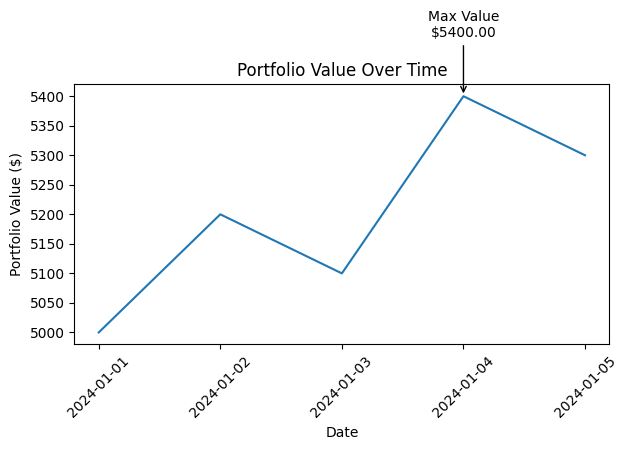

In [234]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(date, portfolio_value)

# Annotate the maximum value
max_value = max(portfolio_value)
max_index = portfolio_value.index(max_value)
ax.annotate(f'Max Value\n${max_value:.2f}',
            xy=(date[max_index], max_value),
            xytext=(date[max_index], max_value + 100),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='center')

plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.title('Portfolio Value Over Time')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


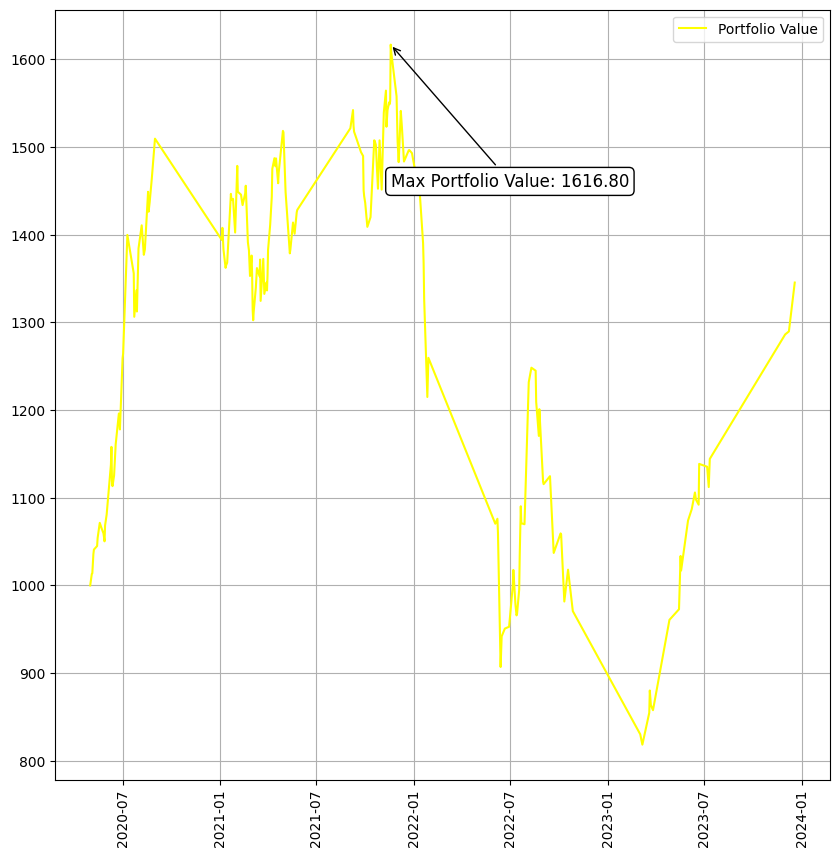

In [146]:
max_portfolio_value = max(portfolio_value)
max_portfolio_date = date[portfolio_value.index(max_portfolio_value)]

plt.figure(figsize=(10, 6))
plt.plot(date, portfolio_value, label='Portfolio Value', color='yellow')

# Annotate maximum portfolio value
plt.annotate(f'Max Portfolio Value: {max_portfolio_value:.2f}',
             xy=(max_portfolio_date, max_portfolio_value),
             xytext=(max_portfolio_date, max_portfolio_value * 0.9),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [147]:
total_return=(portfolio_value[-1]-initial_cash)/initial_cash*100


In [148]:
final_portfolio=portfolio_value[-1]
final_portfolio

1345.4706886866404

In [149]:
total_return

34.54706886866404

In [150]:
stock_prices

[114.302001953125,
 115.79949951171876,
 115.88999938964844,
 118.38050079345705,
 118.98049926757812,
 119.44249725341795,
 120.48899841308594,
 122.46649932861328,
 121.84400177001952,
 121.09300231933594,
 120.51950073242188,
 120.05500030517578,
 122.11849975585938,
 123.552001953125,
 130.04299926757812,
 132.37249755859375,
 127.89800262451172,
 127.2509994506836,
 128.63400268554688,
 132.69900512695312,
 136.72000122070312,
 134.64349365234375,
 143.93499755859375,
 144.51499938964844,
 160.0,
 154.99549865722656,
 149.32749938964844,
 152.760498046875,
 150.01649475097656,
 158.23399353027344,
 161.25,
 157.4080047607422,
 158.11199951171875,
 165.62449645996094,
 163.0240020751953,
 164.23599243164062,
 167.32449340820312,
 172.54800415039062,
 159.3314971923828,
 160.92550659179688,
 158.10800170898438,
 155.7104949951172,
 156.04150390625,
 156.37350463867188,
 165.34950256347656,
 164.6114959716797,
 164.6999969482422,
 160.30999755859375,
 169.0,
 165.62649536132812,
 165

In [151]:
buy_price=[]
sell_price=[]

In [152]:
for i,price in enumerate(stock_prices):
  if date[i] in buy_dates:
    buy_price.append(price)
  else :
    sell_price.append(price)

In [153]:
buy_price

[114.302001953125,
 115.79949951171876,
 115.88999938964844,
 118.38050079345705,
 118.98049926757812,
 119.44249725341795,
 120.48899841308594,
 122.46649932861328,
 121.84400177001952,
 121.09300231933594,
 120.51950073242188,
 120.05500030517578,
 122.11849975585938,
 123.552001953125,
 130.04299926757812,
 132.37249755859375,
 127.89800262451172,
 127.2509994506836,
 128.63400268554688,
 132.69900512695312,
 136.72000122070312,
 134.64349365234375,
 143.93499755859375,
 144.51499938964844,
 160.0,
 154.99549865722656,
 149.32749938964844,
 152.760498046875,
 150.01649475097656,
 158.23399353027344,
 161.25,
 157.4080047607422,
 158.11199951171875,
 165.62449645996094,
 163.0240020751953,
 164.23599243164062,
 167.32449340820312,
 172.54800415039062,
 159.3314971923828,
 160.92550659179688,
 158.10800170898438,
 155.7104949951172,
 156.04150390625,
 156.37350463867188,
 165.34950256347656,
 164.6114959716797,
 164.6999969482422,
 160.30999755859375,
 169.0,
 165.62649536132812,
 165

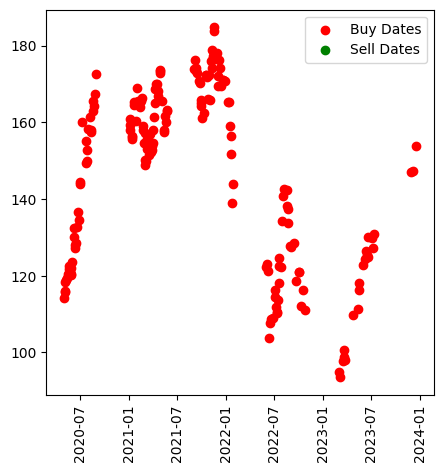

In [154]:
plt.figure(figsize=(5,5))
plt.scatter(buy_dates,buy_price,color='r',label='Buy Dates')
plt.scatter(sell_dates,sell_price,color='g',label='Sell Dates')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


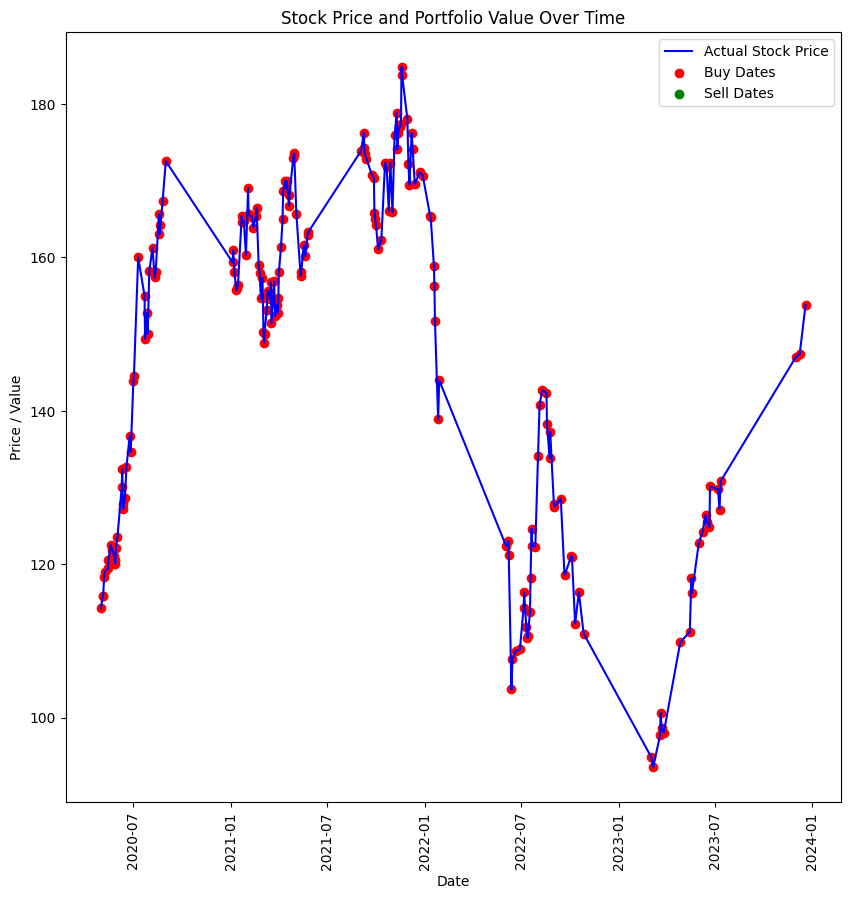

In [155]:
plt.figure(figsize=(10,10))

# Plot actual stock prices
plt.plot(date, stock_prices, color='blue', label='Actual Stock Price')

# Scatter plot for buy dates and prices
plt.scatter(buy_dates, buy_price, color='red', label='Buy Dates')

# Scatter plot for sell dates and prices
plt.scatter(sell_dates, sell_price, color='green', label='Sell Dates')



plt.xticks(rotation='vertical')
plt.legend()
plt.title('Stock Price and Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Price / Value')
plt.show()